In [7]:
car.data <- read.table("car.new.rsquare", sep = '\t', header = FALSE)

In [8]:
head(car.data)

V1,V2,V3,V4,V5
NIKPRLRSP037996_06012003,99_Others,8379,-0.003205364,0.26349408
NIKPRLRSP038002_06012003,01: Product,2875,-0.022201523,0.07838716
NIKPRLRSP038003_06012003,01: Product,2875,-0.022201523,0.07838716
NIKPRLRSP038004_06012003,03: Technology,4776,-0.104686593,0.05196446
NIKPRLRSP038007_06012003,01: Product,4543,-0.019885189,0.31794175
NIKPRLRSP038008_06012003,01: Product,2875,-0.022201523,0.07838716


## 新しいマッチングでの全体的な傾向

In [25]:
car.val <- as.numeric(as.character(car.data$V4)) * 100
length(car.val)
head(car.val, n = 100)

[1] 47301

[1] -3.205364e-01 -2.220152e+00 -2.220152e+00 -1.046866e+01 -1.988519e+00
  [6] -2.220152e+00 -2.220152e+00 -2.220152e+00  1.019806e+00  1.814947e+00
 [11]  2.288931e+00  2.150209e+00 -3.213159e+00  2.106792e+00 -2.449081e+00
 [16] -1.145145e+00 -1.145145e+00  1.792063e+00 -2.220450e+00 -4.000327e+00
 [21] -2.657769e-01 -3.783467e-01 -1.022930e+00 -2.099309e+00  3.090863e+00
 [26] -2.150491e+00 -2.150491e+00 -1.425717e+00 -4.685112e+00 -5.965759e-01
 [31] -5.965759e-01 -2.489073e+00  2.675483e+00  2.675483e+00  2.675483e+00
 [36]  2.675483e+00  3.347626e+00  7.799953e-01  5.031226e+00  3.225673e+00
 [41] -2.814173e+00 -2.620306e+00  1.596936e+00  3.252612e+00 -1.825484e+00
 [46] -1.968174e+00  1.051724e+00  5.061269e+00 -1.293923e+00  7.665868e+00
 [51]  2.231349e+00 -1.418085e+00 -3.295969e+00 -2.498317e+00 -1.388389e+00
 [56] -1.331589e+00 -3.295969e+00 -1.411847e+00 -3.295969e+00 -1.011038e+00
 [61] -1.011038e+00 -1.154188e+00 -1.154188e+00 -2.014633e+00  6.582677e-01
 [66] -3.045031e+00 -2.686228e+00 -1.939384e+00 -1.939384e+00 -2.686228e+00
 [71] -2.636526e+00  8.937021e+00  6.582677e-01  6.582677e-01  6.582677e-01
 [76] -1.388908e+00 -1.388908e+00  1.081696e+00 -1.662272e+00  3.402649e-01
 [81]  3.323137e+00 -8.265649e-01  5.883413e+00  5.883413e+00 -7.849853e-02
 [86] -6.470888e+00  1.043595e-01 -4.251039e-01  2.473325e+00  8.282494e-01
 [91] -2.867233e+00 -3.646055e-04 -2.587205e+00  8.629379e+00  7.517402e-01
 [96]  7.517402e-01  7.517402e-01  7.517402e-01 -1.320521e+00 -1.320521e+00

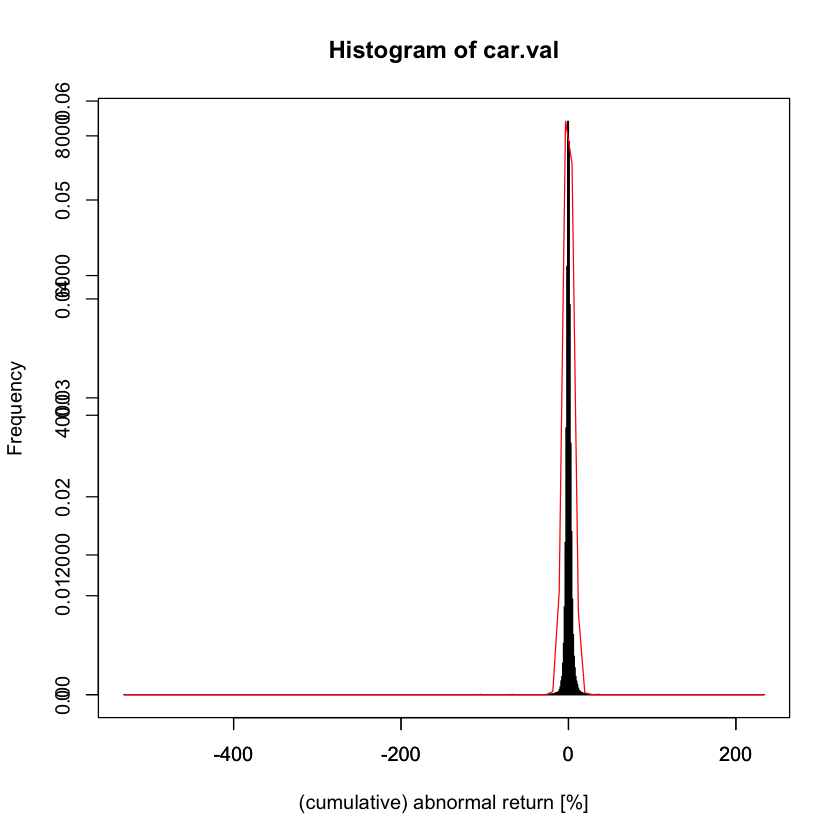

In [26]:
hist(car.val, breaks = 1000, xlim = c(min(car.val),max(car.val)), xlab = "(cumulative) abnormal return [%]")
par(new=T)
curve(dnorm(x, mean=mean(car.val), sd=sqrt(var(car.val))), from=min(car.val), to=max(car.val), col="red", xlab="", ylab="")   # 正規分布を重ね書き

-> 低いCARが無くなったように見えるが、maxが増えただけでminは昔のマッチングと変わっていない。

In [27]:
mean(car.val)

[1] 0.08566283

In [12]:
t.test(car.val)


	One Sample t-test

data:  car.val
t = 3.2664, df = 47300, p-value = 0.00109
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.03426006 0.13706561
sample estimates:
 mean of x 
0.08566283 


-> 全体的に見ると平均は0%と見なして良さそう

In [13]:
sd(car.val)

[1] 5.703777

In [14]:
max(car.val)
min(car.val)

[1] 233.575

[1] -530.9016

In [15]:
length(car.val)

[1] 47301

In [16]:
length(car.val[car.val >= 10.])
length(car.val[car.val <= -10.])

[1] 558

[1] 331

-> 前のマッチングと比べて、0に近い値の割合が増えた。また、平均値はわずかに正方向に移動し、分散もわずかに大きくなった。

In [25]:
# 両側それぞれ0.1%ずつのデータを除去
trim.min <- sort(car.val)[length(car.val) * 0.001]
trim.max <- sort(car.val)[length(car.val) * 0.999]
trim.min
trim.max
mean(car.val[trim.min <= car.val & car.val <= trim.max])

[1] -20.2615

[1] 21.94011

[1] 0.1059141

## プレスリリースのタイプごとの傾向

In [17]:
types <- c('04: Restructuring', '05: PR', '01: Product', '05: Price', '05: Promotion', '10: Exit', '04: License', '03: Technology', '06: Capacity', '04: Alliance', '06: Order', '04: Contract', '02: Process', '04: M&A')

In [18]:
car.data.type <- car.data[car.data$V2 == '01: Product',]

In [19]:
head(car.data.type)

,V1,V2,V3,V4,V5
2,NIKPRLRSP038002_06012003,01: Product,2875,-0.02220152,0.07838716
3,NIKPRLRSP038003_06012003,01: Product,2875,-0.02220152,0.07838716
5,NIKPRLRSP038007_06012003,01: Product,4543,-0.01988519,0.31794175
6,NIKPRLRSP038008_06012003,01: Product,2875,-0.02220152,0.07838716
7,NIKPRLRSP038012_06012003,01: Product,2875,-0.02220152,0.07838716
8,NIKPRLRSP038015_06012003,01: Product,2875,-0.02220152,0.07838716


In [20]:
quantile(car.data.type$V4)

0%           25%           50%           75%          100% 
-5.3090162537 -0.0152893800 -0.0004227838  0.0151158710  0.6233539344

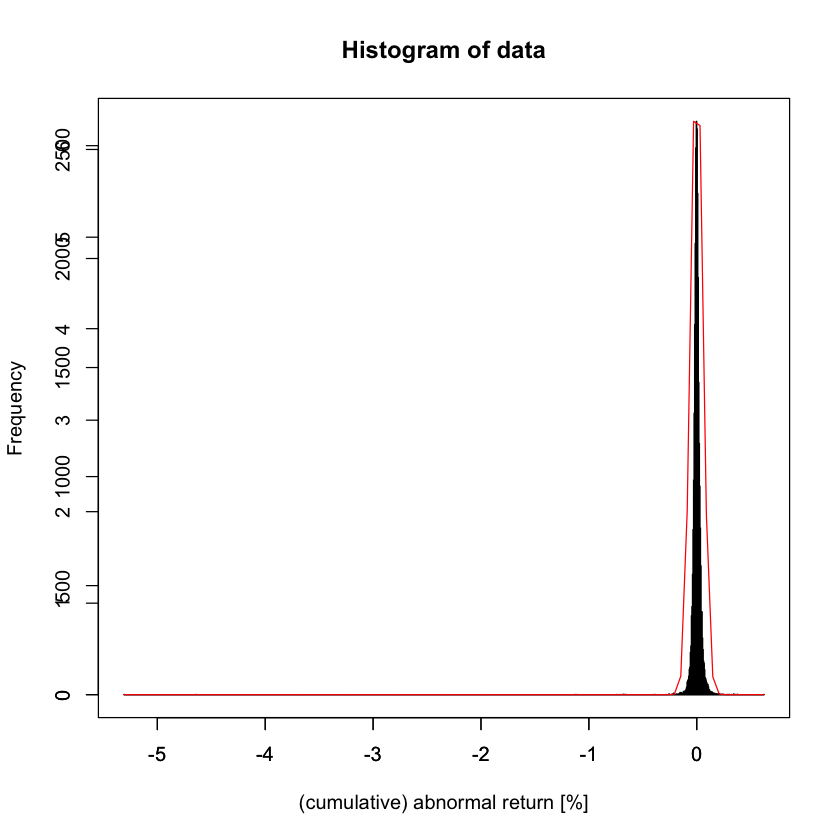

In [21]:
print.result(car.data.type$V4)

In [22]:
print.result <- function(data) {
    hist(data, breaks = 1000, xlim = c(min(data),max(data)), xlab = "(cumulative) abnormal return [%]")
    par(new=T)
    curve(dnorm(x, mean=mean(data), sd=sqrt(var(data))), from=min(data), to=max(data), col="red", xlab="", ylab="")   # 正規分布を重ね書き
}

In [31]:
car.types <- list()
for (type in sort(types)) {
    car.val.type <- as.numeric(as.character(car.data[car.data$V2 == type,]$V4)) * 100
    #print(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type)))
    #print(list(c(t, length(car.val.type), mean(car.val.type), sd(car.val.type), min(car.val.type), max(car.val.type))))
    pv <- t.test(car.val.type)$p.value
    car.types <- c(car.types, list(c(type, length(car.val.type), mean(car.val.type), pv, sd(car.val.type), min(car.val.type), max(car.val.type))))
}
Unzip <- function(...) rbind(data.frame(), ...)
car.frame <- do.call(Unzip, car.types)
colnames(car.frame) <- c("prtype", "num", "mean[%]", "p-value (mean != 0)", "sd", "min", "max")
#car.frame

# print histgram
#for (t in sort(types)) {
#    car.val.type <- as.numeric(car.data[car.data$V2 == t,]$V4) * 100
#    print.result(car.val.type)
#}

In [32]:
car.frame[order(as.numeric(as.character(car.frame$"mean[%]")), decreasing = TRUE),]

,prtype,num,mean[%],p-value (mean != 0),sd,min,max
13,06: Order,1281,0.471743404112856,1.2674258484929e-05,3.85236144260533,-17.556352368,29.8542846858
6,04: License,597,0.470464846440761,0.000512624149533842,3.29070919947624,-13.5220998058,15.360199649
5,04: Contract,1463,0.431430901673554,0.000103292533890107,4.23839776732354,-38.1125079952,54.23274463
11,05: Promotion,27,0.397554675559593,0.568666028894228,3.57796267249375,-4.72709239255,8.84010166398
2,02: Process,416,0.379545283647872,0.0140280088268942,3.13791775233114,-9.99352611615,13.1342816086
7,04: M&A,986,0.259380769117478,0.0280336313790558,3.70203088972207,-19.4351507005,20.400756445
12,06: Capacity,2504,0.218474963548358,0.00261581101141767,3.62887307276815,-67.4676078359,19.3944445638
4,04: Alliance,1425,0.198902161642113,0.331017169162422,7.72151244006308,-105.042197299,62.7280506375
10,05: Price,546,0.172747739661602,0.244951256004948,3.4679453087967,-11.9792427275,20.00076605
3,03: Technology,3124,0.121335363839306,0.0477206344940449,3.42404948836113,-24.0026883878,31.5555483195


平均値でソートしたもの。大事そうなタイプから並んでいたりする。。？

"01: Product"は全体的に見るとほぼ影響なしとなっている

p値は多重検定補正はしていない

In [44]:
car.data$V4 <- as.numeric(as.character(car.data$V4))

In [46]:
car.data[car.data$V4 < -5,]

,V1,V2,V3,V4,V5
42219,NIKPRLRSP247604_26032010,01: Product,8703,-5.309016,0.3493893
42220,NIKPRLRSP247605_26032010,05: PR,8703,-5.309016,0.3493893


### 企業ごとのCARは？